<a href="https://colab.research.google.com/github/ajiarindazahra/POSTTEST2-DATMIN/blob/main/Aji_Arinda_Zahra_Posttest_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (1) Apriori

Gunakan dataset ini : https://drive.google.com/file/d/1BqC-2d1ZYqFIFwdjdsW5bAAqNFh2AO4C/view?usp=share_link

Dan buatlah daftar support dan confidence untuk 2 item set dengan menggunakan dataset tersebut (hint : buatlah tabel tabulasi terlebih dahulu untuk memudahkan)

In [ ]:
import pandas as pd

In [ ]:
with open("dataset_market_basket.txt") as file:
  raw_data = file.read()

In [ ]:
raw_data

'whole milk,pastry,salty snack\nsausage,whole milk,semi-finished bread,yogurt\nsoda,pickled vegetables\ncanned beer,misc. beverages\nsausage,hygiene articles\nsausage,whole milk,rolls/buns\nwhole milk,soda\nfrankfurter,soda,whipped/sour cream\nfrankfurter,curd\nbeef,white bread\nbutter,whole milk\nfrozen vegetables,other vegetables\ntropical fruit,sugar\nbutter milk,specialty chocolate\nfrozen meals,dental care\nrolls/buns,rolls/buns\nroot vegetables,detergent\nsausage,rolls/buns\ndish cleaner,cling film/bags'

In [ ]:
data = raw_data.split("\n")

In [ ]:
dataset =[item.split(",") for item in data]

In [ ]:
#mengubah list of lists menjadi satu list tunggal
items = [item for sublist in dataset for item in sublist]

#membuat set unik dari items
unique_items = set(items)

# menghitung frekuensi setiap jenis item pada setiap baris dalam dataset
tabular_data = []
for row in dataset:
    row_data = {}
    for item in unique_items:
        row_data[item] = row.count(item)
    tabular_data.append(row_data)    

# membuat tabel tabular menggunakan pandas DataFrame
df = pd.DataFrame(tabular_data)
df

,yogurt,other vegetables,curd,detergent,sausage,salty snack,white bread,pickled vegetables,dental care,whole milk,...,root vegetables,frozen meals,canned beer,whipped/sour cream,frozen vegetables,hygiene articles,frankfurter,semi-finished bread,dish cleaner,beef
0,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
8,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df.sum()

yogurt                 1
other vegetables       1
curd                   1
detergent              1
sausage                4
salty snack            1
white bread            1
pickled vegetables     1
dental care            1
whole milk             5
butter                 1
misc. beverages        1
cling film/bags        1
pastry                 1
tropical fruit         1
specialty chocolate    1
soda                   3
rolls/buns             4
sugar                  1
butter milk            1
root vegetables        1
frozen meals           1
canned beer            1
whipped/sour cream     1
frozen vegetables      1
hygiene articles       1
frankfurter            2
semi-finished bread    1
dish cleaner           1
beef                   1
dtype: int64

In [ ]:
df.columns

Index(['yogurt', 'other vegetables', 'curd', 'detergent', 'sausage',
       'salty snack', 'white bread', 'pickled vegetables', 'dental care',
       'whole milk', 'butter', 'misc. beverages', 'cling film/bags', 'pastry',
       'tropical fruit', 'specialty chocolate', 'soda', 'rolls/buns', 'sugar',
       'butter milk', 'root vegetables', 'frozen meals', 'canned beer',
       'whipped/sour cream', 'frozen vegetables', 'hygiene articles',
       'frankfurter', 'semi-finished bread', 'dish cleaner', 'beef'],
      dtype='object')

In [ ]:
from itertools import permutations

list_barang = list(permutations(df.columns,2))
list_barang

[('yogurt', 'other vegetables'),
 ('yogurt', 'curd'),
 ('yogurt', 'detergent'),
 ('yogurt', 'sausage'),
 ('yogurt', 'salty snack'),
 ('yogurt', 'white bread'),
 ('yogurt', 'pickled vegetables'),
 ('yogurt', 'dental care'),
 ('yogurt', 'whole milk'),
 ('yogurt', 'butter'),
 ('yogurt', 'misc. beverages'),
 ('yogurt', 'cling film/bags'),
 ('yogurt', 'pastry'),
 ('yogurt', 'tropical fruit'),
 ('yogurt', 'specialty chocolate'),
 ('yogurt', 'soda'),
 ('yogurt', 'rolls/buns'),
 ('yogurt', 'sugar'),
 ('yogurt', 'butter milk'),
 ('yogurt', 'root vegetables'),
 ('yogurt', 'frozen meals'),
 ('yogurt', 'canned beer'),
 ('yogurt', 'whipped/sour cream'),
 ('yogurt', 'frozen vegetables'),
 ('yogurt', 'hygiene articles'),
 ('yogurt', 'frankfurter'),
 ('yogurt', 'semi-finished bread'),
 ('yogurt', 'dish cleaner'),
 ('yogurt', 'beef'),
 ('other vegetables', 'yogurt'),
 ('other vegetables', 'curd'),
 ('other vegetables', 'detergent'),
 ('other vegetables', 'sausage'),
 ('other vegetables', 'salty snack')

In [ ]:
list_gabungan = []
for rule in list_barang:

  if len (df[(df[rule[0]]==1) & (df[rule[1]]==1)]) >0:
    list_gabungan.append(rule)

list_gabungan

[('yogurt', 'sausage'),
 ('yogurt', 'whole milk'),
 ('yogurt', 'semi-finished bread'),
 ('other vegetables', 'frozen vegetables'),
 ('curd', 'frankfurter'),
 ('detergent', 'root vegetables'),
 ('sausage', 'yogurt'),
 ('sausage', 'whole milk'),
 ('sausage', 'rolls/buns'),
 ('sausage', 'hygiene articles'),
 ('sausage', 'semi-finished bread'),
 ('salty snack', 'whole milk'),
 ('salty snack', 'pastry'),
 ('white bread', 'beef'),
 ('pickled vegetables', 'soda'),
 ('dental care', 'frozen meals'),
 ('whole milk', 'yogurt'),
 ('whole milk', 'sausage'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'butter'),
 ('whole milk', 'pastry'),
 ('whole milk', 'soda'),
 ('whole milk', 'rolls/buns'),
 ('whole milk', 'semi-finished bread'),
 ('butter', 'whole milk'),
 ('misc. beverages', 'canned beer'),
 ('cling film/bags', 'dish cleaner'),
 ('pastry', 'salty snack'),
 ('pastry', 'whole milk'),
 ('tropical fruit', 'sugar'),
 ('specialty chocolate', 'butter milk'),
 ('soda', 'pickled vegetables'),
 ('sod

In [ ]:
hitung = {}
for rule in list_gabungan:
  banyak_data = len(df[
      (df[rule[0]]==1) & (df[rule[1]]==1)
  ])
  hitung[str(rule)] = banyak_data

hitung

{"('yogurt', 'sausage')": 1,
 "('yogurt', 'whole milk')": 1,
 "('yogurt', 'semi-finished bread')": 1,
 "('other vegetables', 'frozen vegetables')": 1,
 "('curd', 'frankfurter')": 1,
 "('detergent', 'root vegetables')": 1,
 "('sausage', 'yogurt')": 1,
 "('sausage', 'whole milk')": 2,
 "('sausage', 'rolls/buns')": 2,
 "('sausage', 'hygiene articles')": 1,
 "('sausage', 'semi-finished bread')": 1,
 "('salty snack', 'whole milk')": 1,
 "('salty snack', 'pastry')": 1,
 "('white bread', 'beef')": 1,
 "('pickled vegetables', 'soda')": 1,
 "('dental care', 'frozen meals')": 1,
 "('whole milk', 'yogurt')": 1,
 "('whole milk', 'sausage')": 2,
 "('whole milk', 'salty snack')": 1,
 "('whole milk', 'butter')": 1,
 "('whole milk', 'pastry')": 1,
 "('whole milk', 'soda')": 1,
 "('whole milk', 'rolls/buns')": 1,
 "('whole milk', 'semi-finished bread')": 1,
 "('butter', 'whole milk')": 1,
 "('misc. beverages', 'canned beer')": 1,
 "('cling film/bags', 'dish cleaner')": 1,
 "('pastry', 'salty snack')": 

In [ ]:
#List Support
list_support = [i/len(df)*100 for i in hitung.values()]
for item,support in hitung.items():
  print(f"{item} support = {round(support/len(df)*100)}%")

('yogurt', 'sausage') support = 5%
('yogurt', 'whole milk') support = 5%
('yogurt', 'semi-finished bread') support = 5%
('other vegetables', 'frozen vegetables') support = 5%
('curd', 'frankfurter') support = 5%
('detergent', 'root vegetables') support = 5%
('sausage', 'yogurt') support = 5%
('sausage', 'whole milk') support = 11%
('sausage', 'rolls/buns') support = 11%
('sausage', 'hygiene articles') support = 5%
('sausage', 'semi-finished bread') support = 5%
('salty snack', 'whole milk') support = 5%
('salty snack', 'pastry') support = 5%
('white bread', 'beef') support = 5%
('pickled vegetables', 'soda') support = 5%
('dental care', 'frozen meals') support = 5%
('whole milk', 'yogurt') support = 5%
('whole milk', 'sausage') support = 11%
('whole milk', 'salty snack') support = 5%
('whole milk', 'butter') support = 5%
('whole milk', 'pastry') support = 5%
('whole milk', 'soda') support = 5%
('whole milk', 'rolls/buns') support = 5%
('whole milk', 'semi-finished bread') support = 5%


In [ ]:
#List Confident
for item,ab in hitung.items():
  i = eval(item)
  print(f"{i[0]}->{i[1]} Confidence = {ab/df[i[0]].sum()*100}%")

yogurt->sausage Confidence = 100.0%
yogurt->whole milk Confidence = 100.0%
yogurt->semi-finished bread Confidence = 100.0%
other vegetables->frozen vegetables Confidence = 100.0%
curd->frankfurter Confidence = 100.0%
detergent->root vegetables Confidence = 100.0%
sausage->yogurt Confidence = 25.0%
sausage->whole milk Confidence = 50.0%
sausage->rolls/buns Confidence = 50.0%
sausage->hygiene articles Confidence = 25.0%
sausage->semi-finished bread Confidence = 25.0%
salty snack->whole milk Confidence = 100.0%
salty snack->pastry Confidence = 100.0%
white bread->beef Confidence = 100.0%
pickled vegetables->soda Confidence = 100.0%
dental care->frozen meals Confidence = 100.0%
whole milk->yogurt Confidence = 20.0%
whole milk->sausage Confidence = 40.0%
whole milk->salty snack Confidence = 20.0%
whole milk->butter Confidence = 20.0%
whole milk->pastry Confidence = 20.0%
whole milk->soda Confidence = 20.0%
whole milk->rolls/buns Confidence = 20.0%
whole milk->semi-finished bread Confidence 

#(2) KNN

Gunakan dataset ini : https://drive.google.com/file/d/1pXAJZZXCXosf0PTJkyogopKaPFxCYl22/view?usp=share_link

Kemudian buatlah tabel jarak berdasarkan data berikut ini : 

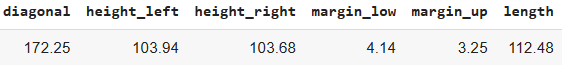
<!-- 1412 -->

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np

In [ ]:
df = pd.read_csv("deteksi_uang_palsu.csv")
df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,172.06,104.24,103.66,4.24,3.10,113.02
1,True,171.66,103.68,103.41,4.35,3.33,113.74
2,True,172.23,104.00,103.35,4.43,2.95,113.12
3,True,172.07,104.21,103.82,4.29,3.35,113.30
4,True,171.79,104.57,104.04,4.26,3.15,113.46
5,False,172.00,104.23,104.52,5.76,3.37,110.94
6,False,171.56,104.03,103.93,5.47,3.50,111.67
7,False,171.90,104.33,104.40,4.70,3.31,112.12
8,False,171.84,104.06,104.10,4.87,3.25,111.04
9,False,172.11,104.14,104.15,4.84,3.28,110.98


## 1. Tambahkan kolom jarak untuk menampilkan jarak dari dataset terhadap target prediksi

In [ ]:
#membuat tabel jarak

In [ ]:
# membuat dataframe dari data baru
new_data = pd.DataFrame({'diagonal': [172.25],
                         'height_left': [103.94],
                         'height_right': [103.68],
                         'margin_low': [4.14],
                         'margin_up': [3.25],
                         'length': [112.48]})

# Menghitung jarak setiap baris dataframe utama dengan dataframe data baru
df['distance'] = np.sqrt(
    (df['diagonal'] - new_data['diagonal'].values[0])**2
    + (df['height_left'] - new_data['height_left'].values[0])**2
    + (df['height_right'] - new_data['height_right'].values[0])**2
    + (df['margin_low'] - new_data['margin_low'].values[0])**2
    + (df['margin_up'] - new_data['margin_up'].values[0])**2
    + (df['length'] - new_data['length'].values[0])**2
)

# Menampilkan tabel jarak
print('Tabel Jarak : ')
print(df['distance'])

Tabel Jarak : 
0    0.671267
1    1.458321
2    0.834626
3    0.910934
4    1.312593
5    2.421281
6    1.741896
7    1.113463
8    1.722034
9    1.738217
Name: distance, dtype: float64


In [ ]:
# gunakan pandas untuk menampilkan seluruh kolom dibaris yang sesuai
pd.set_option('display.max_columns', None)

# Mengatur lebar tabel menjadi 200
pd.set_option('display.width', 200)

print(df)

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  length  distance
0        True    172.06       104.24        103.66        4.24       3.10  113.02  0.671267
1        True    171.66       103.68        103.41        4.35       3.33  113.74  1.458321
2        True    172.23       104.00        103.35        4.43       2.95  113.12  0.834626
3        True    172.07       104.21        103.82        4.29       3.35  113.30  0.910934
4        True    171.79       104.57        104.04        4.26       3.15  113.46  1.312593
5       False    172.00       104.23        104.52        5.76       3.37  110.94  2.421281
6       False    171.56       104.03        103.93        5.47       3.50  111.67  1.741896
7       False    171.90       104.33        104.40        4.70       3.31  112.12  1.113463
8       False    171.84       104.06        104.10        4.87       3.25  111.04  1.722034
9       False    172.11       104.14        104.15        4.84       3.28  110.9

## 2. Urutkan data berdasarkan K jarak terdekat (Untuk K nya ambil akar 2 dari banyak data)

In [ ]:
# urutkan data dari kecil ke besar
sorted_data = df.sort_values('distance')

# Mencari nilai k
k = int(np.sqrt(len(df)))

# cari data terdekat
data_terdekat = sorted_data.head(k)

# Menampilkan data terdekat
print(data_terdekat)

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  length  distance
0        True    172.06       104.24        103.66        4.24       3.10  113.02  0.671267
2        True    172.23       104.00        103.35        4.43       2.95  113.12  0.834626
3        True    172.07       104.21        103.82        4.29       3.35  113.30  0.910934


## 3. Tentukan apa hasil prediksinya berdasarkan label terbanyak

In [ ]:
print("Berdasarkan jawaban nomor 2, maka hasil prediksinya adalah : True \n")

# Mengimpor library sklearn untuk menggunakan algoritma knn
from sklearn.neighbors import KNeighborsClassifier

# Split data menjadi data training dan data testing
X_train = df.drop(columns=['is_genuine','distance'],axis=1)
y_train = df['is_genuine']

# inisiasi data baru menjadi data tes
test_data = new_data

# membuat variabel knn yang berisikan algoritma KNN dengan nilai K = akar 2 dari banyak data
knn = KNeighborsClassifier(n_neighbors=k)

# melatih knn dengan data training
knn.fit(X_train, y_train)

# memprediksi hasil
prediksi = knn.predict(test_data)
print("Berdasarkan penggunaan library sklearn untuk memprediksi menggunakan Algoritma KNN, hasilnya adalah : "+ ' '.join(map(str, prediksi)))

Berdasarkan jawaban nomor 2, maka hasil prediksinya adalah : True 

Berdasarkan penggunaan library sklearn untuk memprediksi menggunakan Algoritma KNN, hasilnya adalah : True


# (3) Analisis



> Nama : Aji Arinda Zahra
>
>
> Nim : 2109116049


Penjelasan posttest : 

Pilihlah salah satu tema dari daftar tema ini :  
1. Perbankan
2. Kesehatan
3. Ritel
4. Pendidkan

Kemudian lakukan analisis dengan menggunakan struktur CRISP-DM

Dimulai dari Business Understanding Hingga Data Preparation 
<img src="https://th.bing.com/th/id/R.f8efea41ae3cd96d86fbc5b10f81ad77?rik=K4Dr%2biIaVGvW8g&riu=http%3a%2f%2fwww.dataprix.com%2ffiles%2fCRISPDM%2fMetodologia_CRISP_DM1_html_52cdbecf.png&ehk=6ONLJMCVxE421Sjt2JJPE6MfCzrL7LLhDZQPdkJTLcw%3d&risl=&pid=ImgRaw&r=0"/>

Tentukan judul dengan ketentuan setiap orang di kelas beda-beda judulnya dan sumber datasetnya (contoh bisa prediksi atau aturan asosiasi)

Catatan : Tugas ini akan berhubungan dengan posttest terakhir (pertemuan 6)

>Tema : Pendidikan
>
> Judul Data : Student Performance in Exams
>
>Sumber : https://www.kaggle.com/datasets/spscientist/students-performance-in-exams/code

## Bussines Understanding



Students Performance in exams adalah sebuah dataset yang berisi data persiapan dan hasil dari performa siswa saat melakukan sebuah ujian. Data ini diukur melalui gender, etnis, tingkat pendidikan orang tua, makan siang dll.

## Data Understanding

In [ ]:
import pandas as pd

In [ ]:
df2 = pd.read_csv('StudentsPerformance.csv')
df2

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


**Penjelasan Kolom**

* Gender berisi keterangan gender siswa.
* Race/Ethnicity berisi keterangan berasal dari mana siswa tersebut.
* Parental level of education berisi tingkat pendidikan orang tua. 
* Lunch berisi makan siang siswa. 
* Test Preparation berisi persiapan siswa.
* Math score berisi skor ujian matematika.
* Reading score berisi data skor ujian membaca.
* Writing score berisi data skor ujian menulis.

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
df2.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Visualisasi Comparison

In [ ]:
import matplotlib.pyplot as plt
from numpy import array
import seaborn as sns

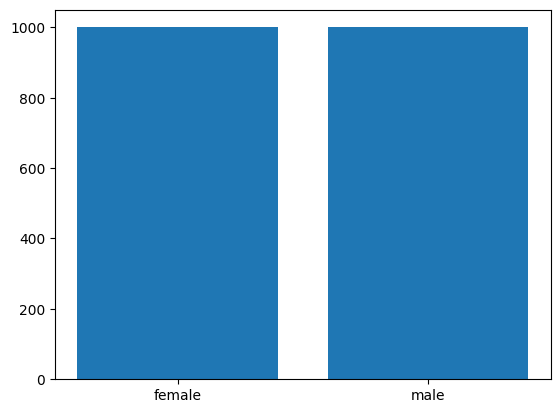

In [ ]:
#Visualisasi Comparison berdasarkan gender
plt.bar(df2['gender'].unique(), len(df2))
plt.show()

<Axes: xlabel='gender', ylabel='count'>

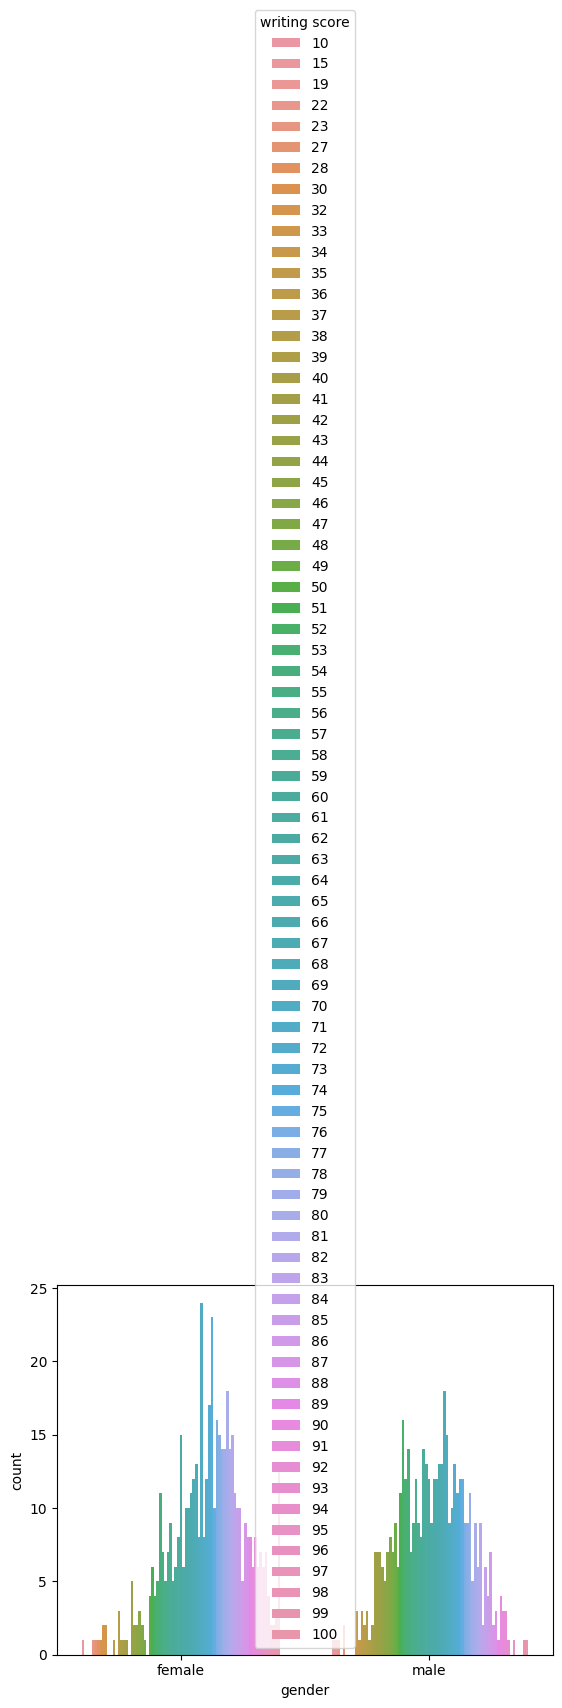

In [ ]:
#Visualisasi Comparison antara gender dan writing score
sns.countplot(x='gender', hue='writing score', data=df2)

<Axes: xlabel='gender', ylabel='count'>

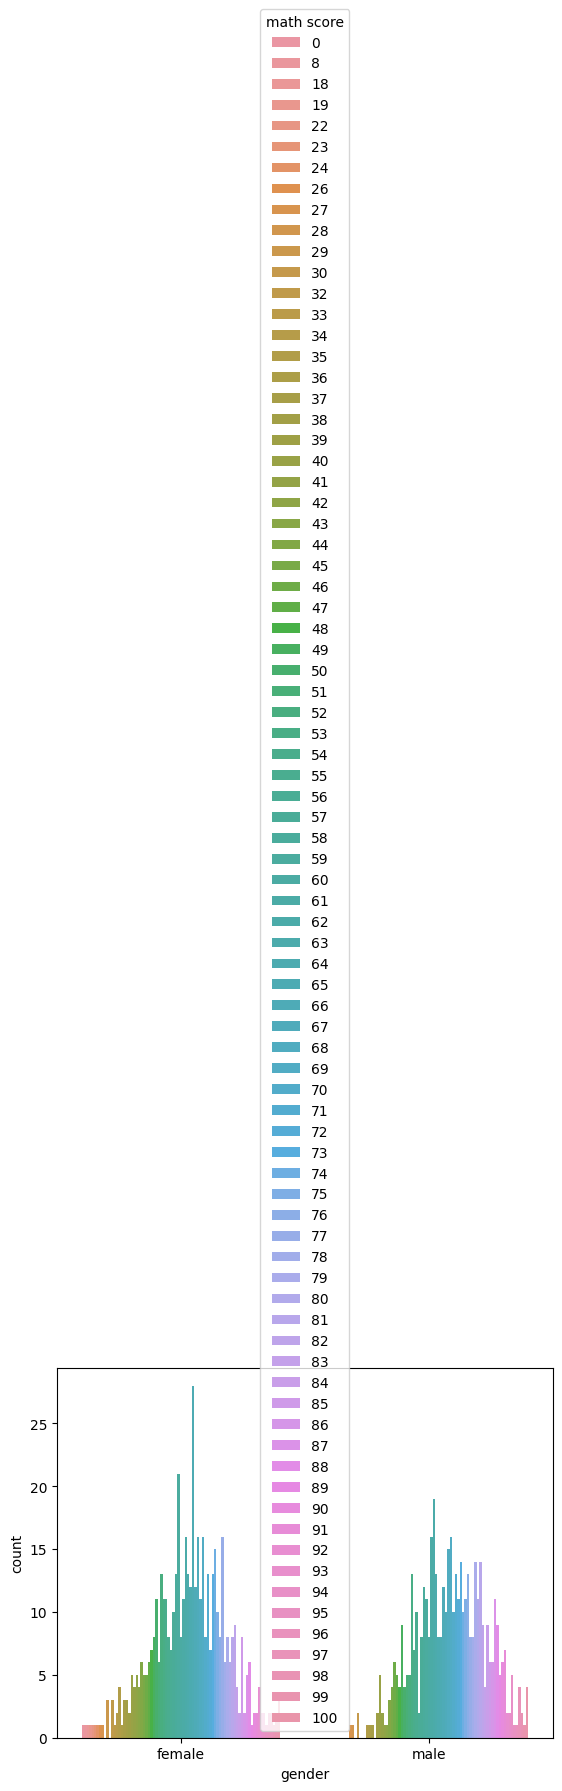

In [ ]:
#Visualisasi Comparison antara gender dan math score
sns.countplot(x='gender', hue='math score', data=df2)

<Axes: xlabel='gender', ylabel='count'>

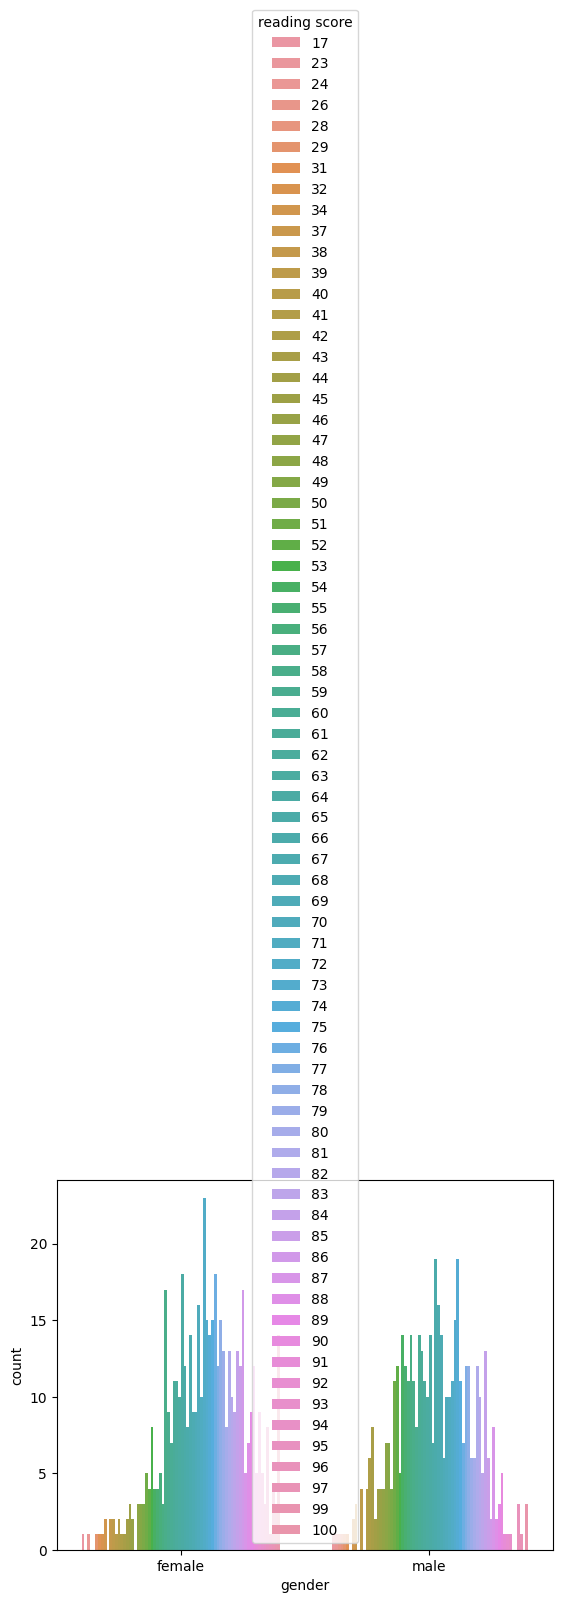

In [ ]:
#Visualisasi Comparison antara gender dan reading score
sns.countplot(x='gender', hue='reading score', data=df2)

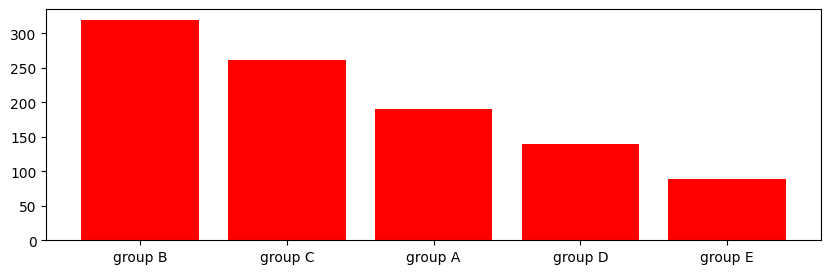

In [ ]:
#Visualisasi Comparison berdasarkan race/etnicity
x = df2['race/ethnicity'].unique()
y = df2['race/ethnicity'].value_counts()

plt.figure(figsize=(10,3))
plt.bar(x, y, color='red')
plt.show()

<Axes: xlabel='race/ethnicity', ylabel='count'>

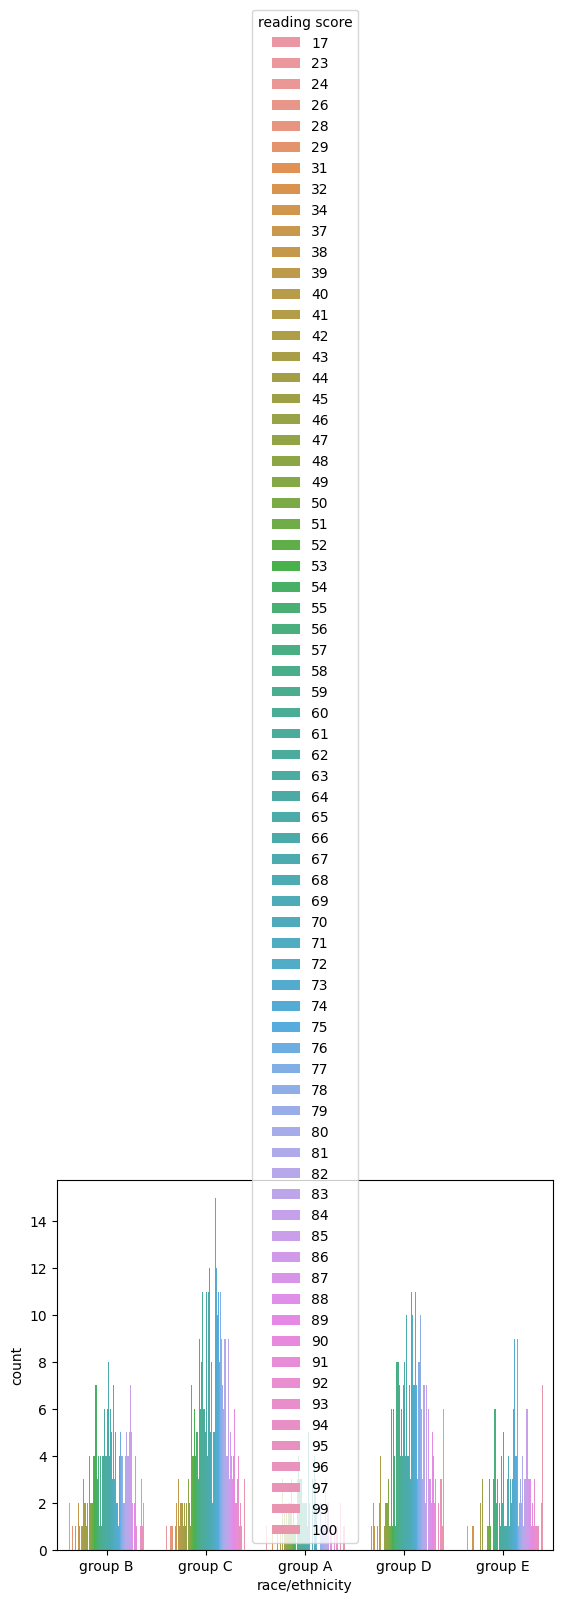

In [ ]:
#Visualisasi Comparison antara race/ethnicity dan reading score
sns.countplot(x='race/ethnicity', hue='reading score', data=df2)

<Axes: xlabel='race/ethnicity', ylabel='count'>

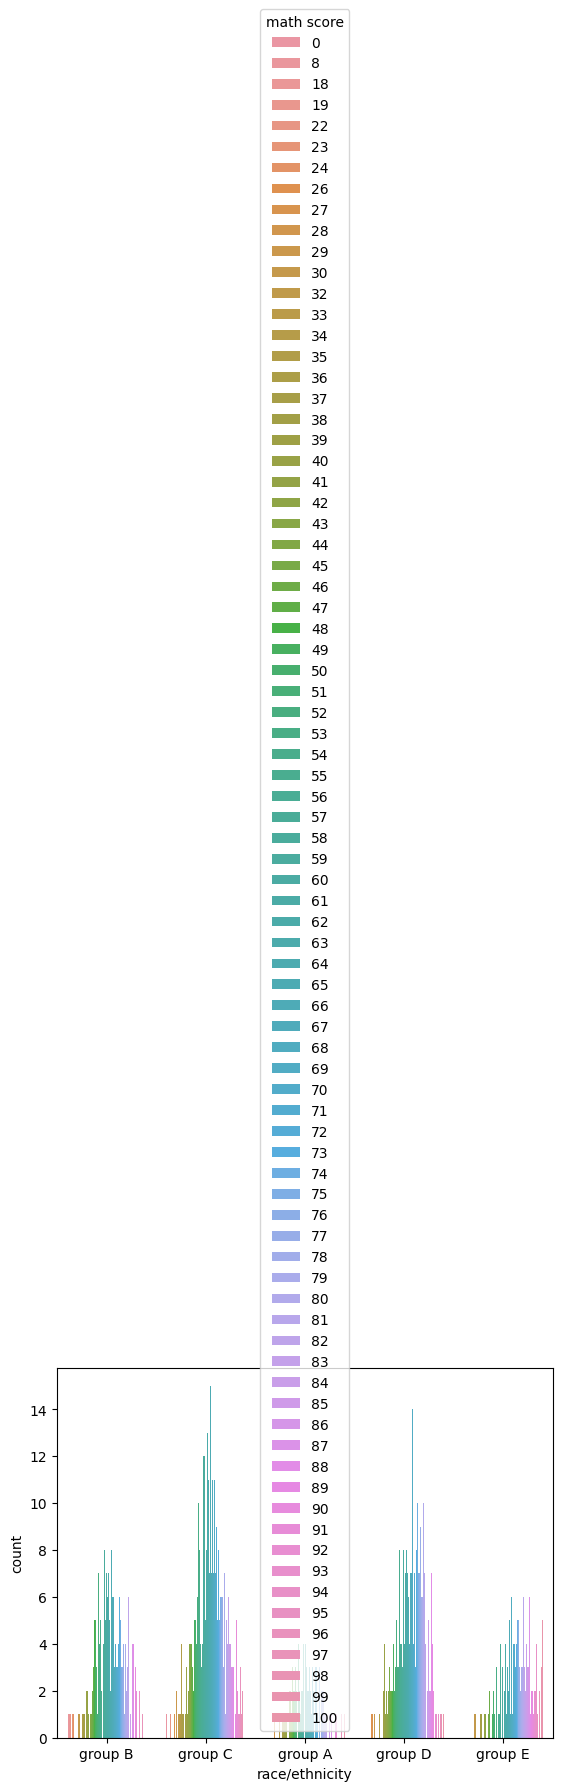

In [ ]:
#Visualisasi Comparison antara race/ethnicity dan math score
sns.countplot(x='race/ethnicity', hue='math score', data=df2)

<Axes: xlabel='race/ethnicity', ylabel='count'>

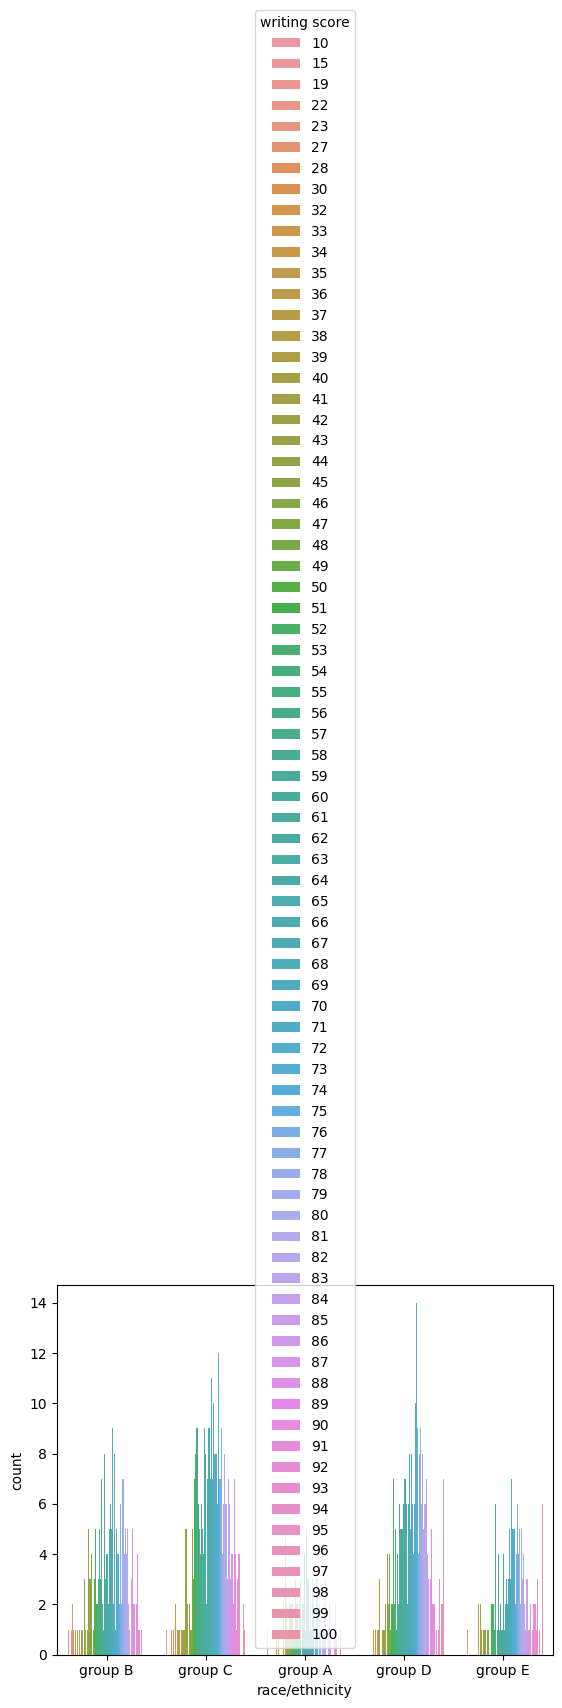

In [ ]:
#Visualisasi Comparison antara race/ethnicity dan writing score
sns.countplot(x='race/ethnicity', hue='writing score', data=df2)

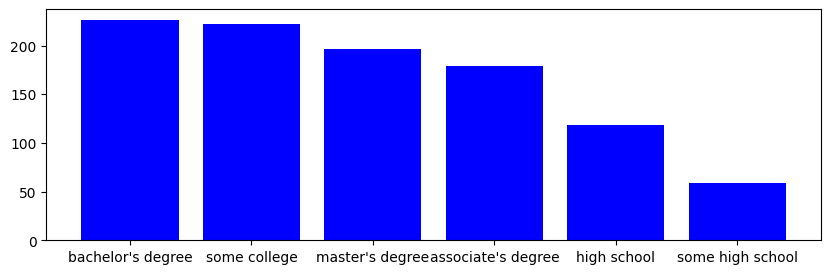

In [ ]:
#Visualisasi Comparison berdasarkan parental level of education
x = df2['parental level of education'].unique()
y = df2['parental level of education'].value_counts()

plt.figure(figsize=(10,3))
plt.bar(x, y, color='blue')
plt.show()	

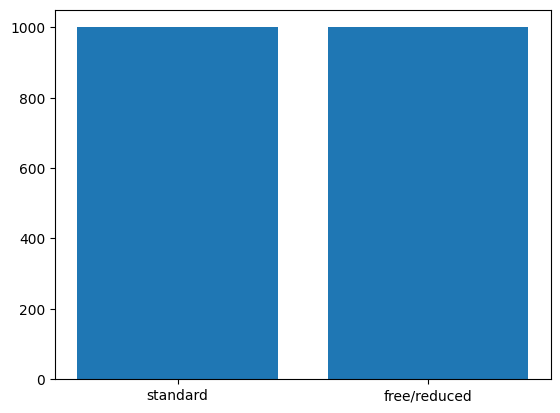

In [ ]:
#Visualisasi Comparison berdasarkan lunch
plt.bar(df2['lunch'].unique(), len(df2))
plt.show()

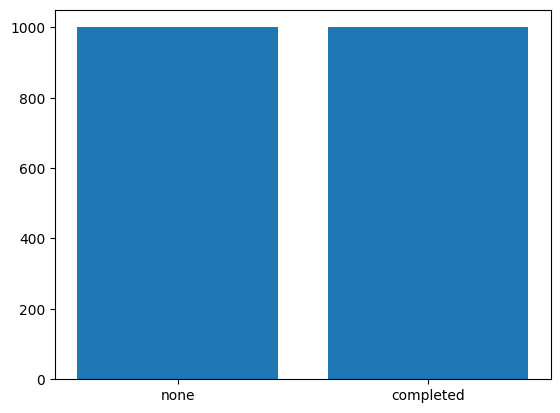

In [ ]:
#Visualisasi Comparison berdasarkan test preparation course
plt.bar(df2['test preparation course'].unique(), len(df2))
plt.show()

<Axes: xlabel='test preparation course', ylabel='count'>

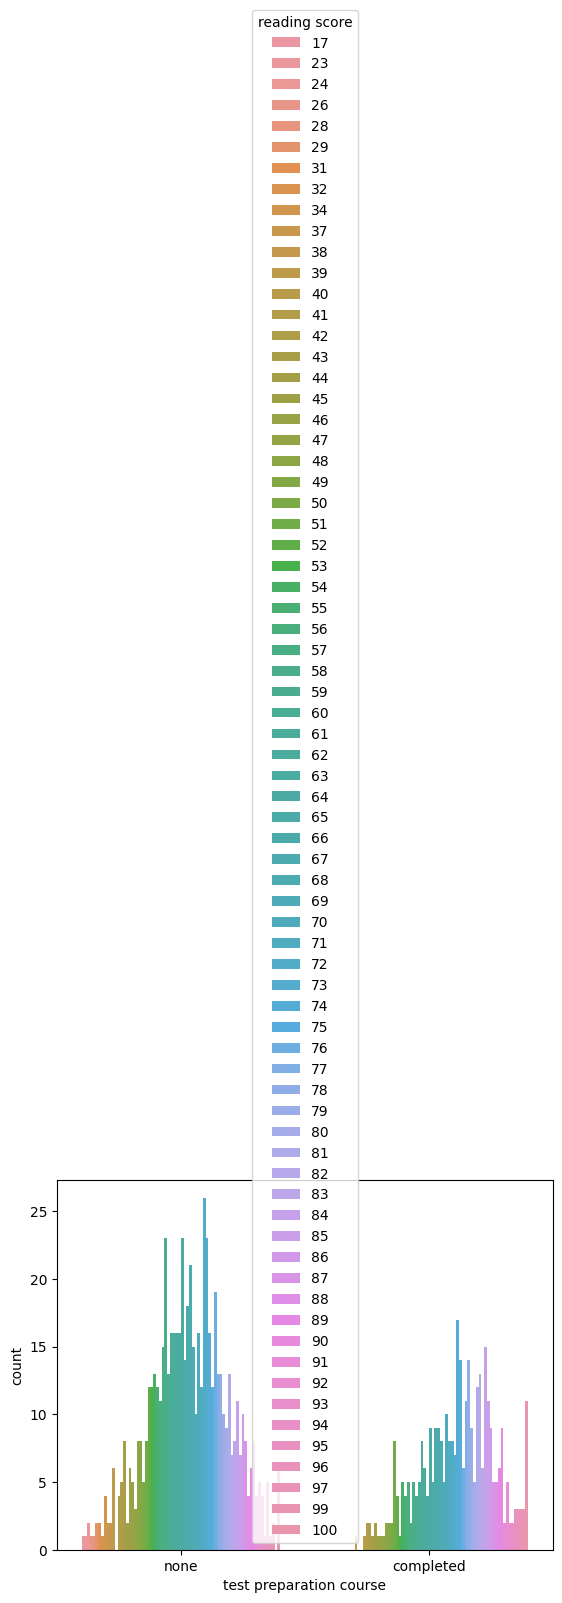

In [ ]:
#Visualisasi Comparison antara test preparation course dan reading score
sns.countplot(x='test preparation course', hue='reading score', data=df2)

<Axes: xlabel='test preparation course', ylabel='count'>

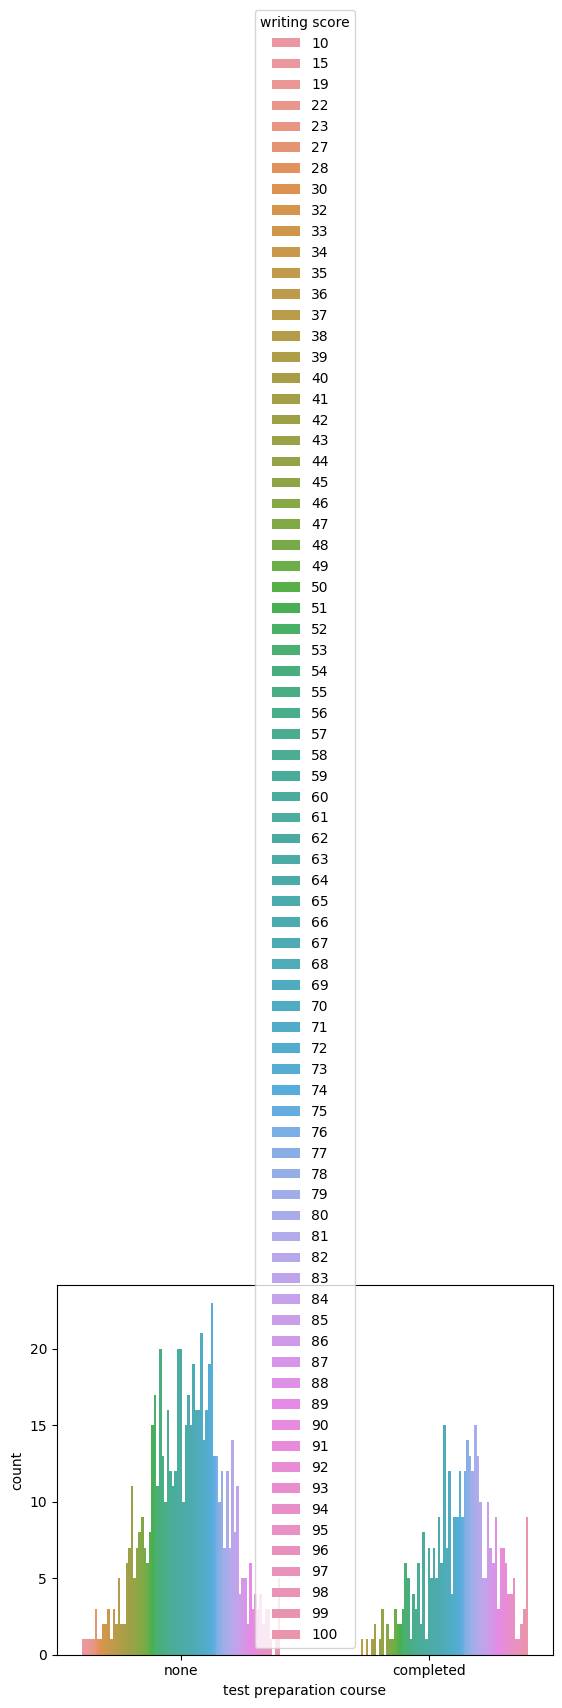

In [ ]:
#Visualisasi Comparison antara test preparation course dan writing score
sns.countplot(x='test preparation course', hue='writing score', data=df2)

<Axes: xlabel='test preparation course', ylabel='count'>

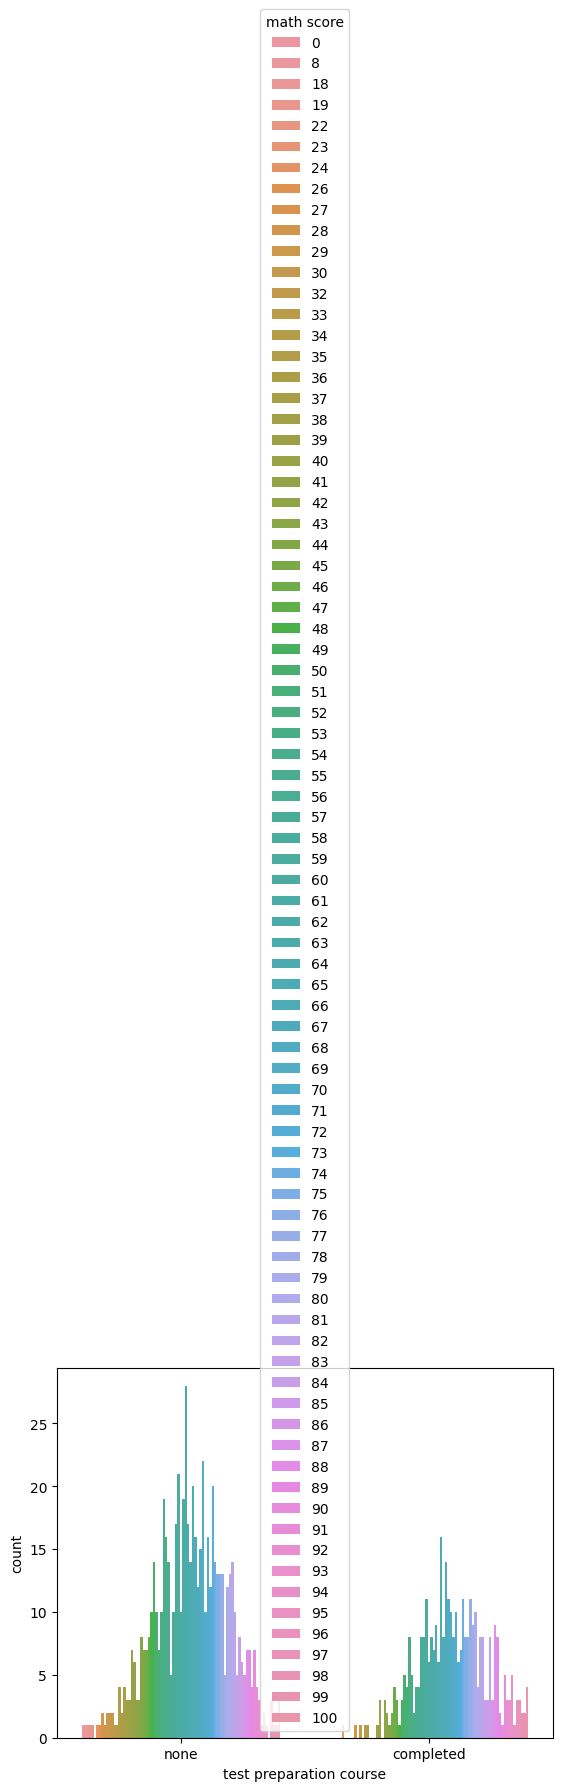

In [ ]:
#Visualisasi Comparison antara test preparation course dan math score
sns.countplot(x='test preparation course', hue='math score', data=df2)

## Visualisasi Relationship

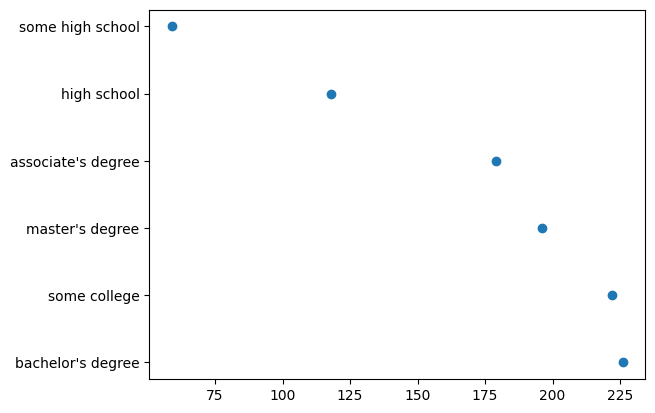

In [ ]:
#visualisasi relationship parental level of education
edukasi = df2['parental level of education'].unique()
edukasi_v = df2['parental level of education'].value_counts()
plt.scatter(edukasi_v, edukasi)

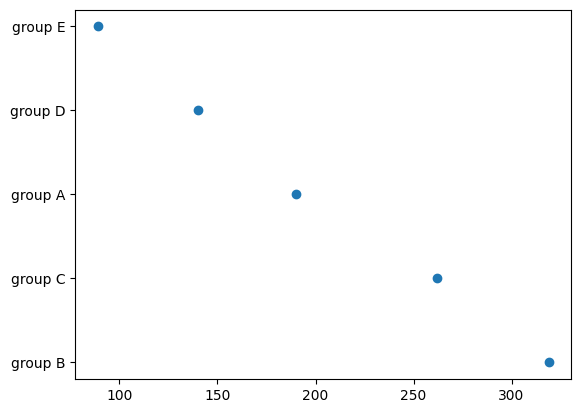

In [ ]:
#visualisasi relationship race/ethnicity
etnis = df2['race/ethnicity'].unique()
etnis_v = df2['race/ethnicity'].value_counts()
plt.scatter(etnis_v, etnis)

## Visualisasi Compotion

([<matplotlib.patches.Wedge at 0x7f774cdc1370>,
 [Text(-0.06217041096298424, 1.0982417038160106, ''),
  Text(0.06217041096298411, -1.0982417038160106, '')])

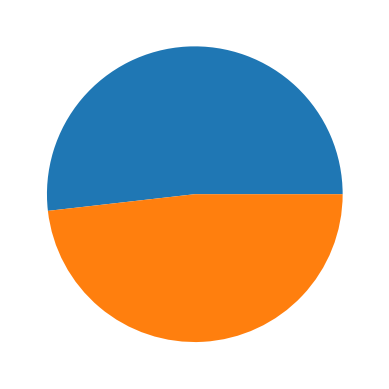

In [ ]:
#Visualisasi Composition gender

gen = df2['gender'].value_counts()
plt.pie(gen)

([<matplotlib.patches.Wedge at 0x7f774cd0e6a0>,
 [Text(0.592324332246979, 0.9269044640242977, ''),
  Text(-1.0461621742897658, 0.3399186742226879, ''),
  Text(-0.49322154359063347, -0.9832255636109514, ''),
  Text(0.5952333666001212, -0.9250390474384775, ''),
  Text(1.057281962489778, -0.3035701760610943, '')])

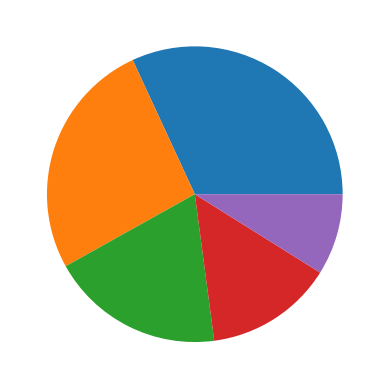

In [ ]:
#Visualisasi Composition race/ethnicity 

et = df2['race/ethnicity'].value_counts()
plt.pie(et)

([<matplotlib.patches.Wedge at 0x7f774cce47f0>,
 [Text(0.8341981156790161, 0.7170170875213359, ''),
  Text(-0.5717990621018805, 0.939705183863221, ''),
  Text(-1.0543739750814827, -0.3135211646298753, ''),
  Text(-0.11383566476996158, -1.0940938905900084, ''),
  Text(0.8112644257554884, -0.7428660925790179, ''),
  Text(1.0811581857178525, -0.20272389463327067, '')])

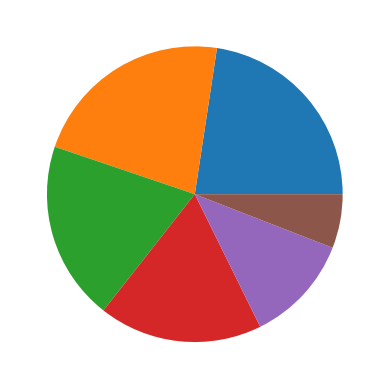

In [ ]:
#Visualisasi Composition race/ethnicity 

edu = df2['parental level of education'].value_counts()
plt.pie(edu)

## Data Preparation 

In [ ]:
df2.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
# Encoding
# Merubah tipe data string jadi int
df3 = pd.get_dummies(df2)
df3

,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,72,72,74,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,69,90,88,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,90,95,93,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,47,57,44,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,76,78,75,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,99,95,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0
996,62,55,55,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
997,59,71,65,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
998,68,78,77,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0


In [ ]:
df2

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


## cleaning data

In [ ]:
df2.isna().sum() / len(df2) * 100

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64

In [ ]:
def tampilkan_data_kosong(df2=df2):
  return df2.isna().sum() / len(df2) * 100